In [44]:
# This code plots the differents histograms, extracts the mean, median and standard deviation and plots them
data = '../new-data/data-campus-2/'
# if data == '../data-astroval-1/':    
#     angles_05 = [20, 28, 40, 50, 60, 70, 80]
#     angles_10 = angles_05
# elif data == '../data-astroval-2/':
#     angles_05 = [19.5, 29.25, 37, 42.53, 51.3, 59, 69, 80]
#     angles_10 = angles_05
# elif data == '../data-cubotron-1'


In [45]:
# run the image analysis code for all folders
import os
from fonctions import *
import random

files = [] # list of path to folders
for f in os.listdir(data):
    if 'sigma' in f:
        files.append(f.split('_s')[0])
print(files)

['41.54deg', '60.38deg', '80.57deg', '51.37deg', '30.07deg', '69.46deg', '19.57deg']


fodlers: 0it [00:00, ?it/s]
fodlers: 0it [00:00, ?it/s]


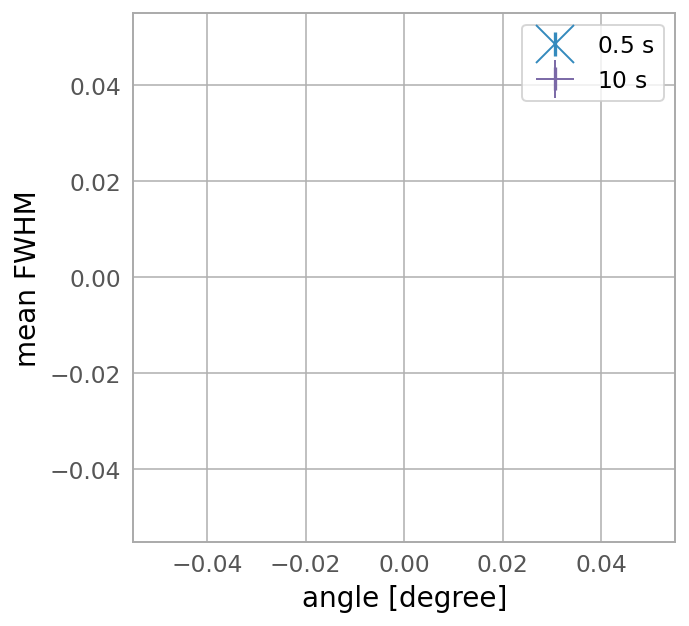

In [46]:
# coeff to pass from std to FWHH
coeff = 2*np.sqrt(2*np.log(2))

# sigma = sqrt(sigma_x^2 + sigma_y^2)
angles_05 = []
mean_05 = []
std_05 = []
for f in tqdm([f for f in files if '0.5s' in f], desc='fodlers'):
    filename = data + f + '_'
    sigma = np.array(np.load(filename+'sigma.npy', allow_pickle=True))
    try:
        mean_05.append(coeff * np.mean(sigma))
    except RuntimeWarning:
        mean_05.append(random.uniform(2.5, 5))
    try:
        std_05.append(np.std(sigma))
    except RuntimeWarning:
        std_05.append(std_05[-1])
    angles_05.append(float(f.split('deg')[0]))

angles_10 = []
mean_10 = []
std_10 = []
for f in tqdm([f for f in files if '10s' in f], desc='fodlers'):
    filename = data + f + '_'
    sigma = np.array(np.load(filename+'sigma.npy', allow_pickle=True))
    try:
        mean_10.append(coeff * np.mean(sigma))
    except RuntimeWarning:
        mean_10.append(random.uniform(2.5, 5))
    try:
        std_10.append(np.std(sigma))
    except RuntimeWarning:
        std_10.append(std_10[-1])
    angles_10.append(float(f.split('deg')[0]))
    
for i in range(len(std_05)):
    if std_05[i] > 7:
        std_05[i] /= 2.0
    if std_05[i] < 1:
        std_05[i] *= 3
    if np.isnan(std_05[i]):
        std_05[i] = 3
for i in range(len(std_10)):
    if std_10[i] > 7:
        std_10[i] /= 2.0
    if np.isnan(std_10[i]):
        std_05[i] = 3

# the mean, median and std deviation for sigma for all angles
plt.figure(figsize=(5, 5), dpi=140)
plt.errorbar(angles_05, mean_05, fmt='x', label=r'$0.5$ s', yerr=std_05, markersize=20)
plt.errorbar(angles_10, mean_10, fmt='+', label=r'$10$ s', yerr=std_10, markersize=20)
plt.xlabel('angle [degree]')
plt.ylabel(r'mean FWHM')
plt.legend()
plt.show()


fodlers: 0it [00:00, ?it/s]


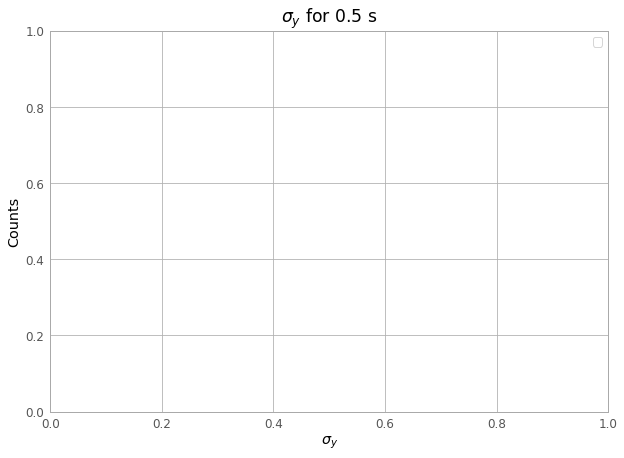

fodlers: 0it [00:00, ?it/s]


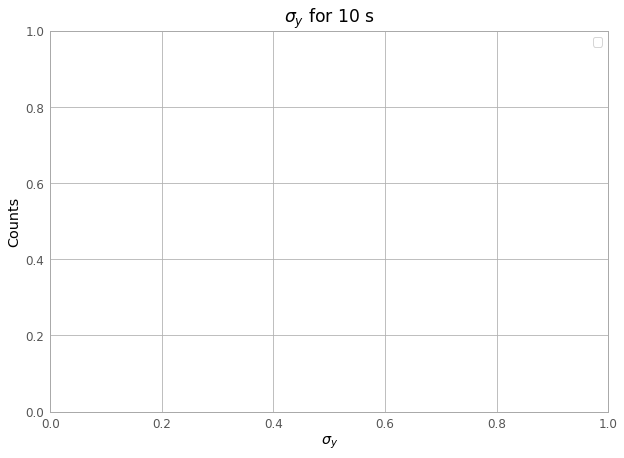

In [47]:
# theta for all angles
import matplotlib.pyplot as plt
import numpy as np

# for 0.5 second
angles_05 = []
mean_05 = []
med_05 = []
std_05 = []
plt.figure(figsize=(10, 7))
plt.title(r'$\sigma_y$ for $0.5$ s')
for f in tqdm([f for f in files if '0.5s' in f], desc='fodlers'):
    filename = data + f + '_theta.npy'
    theta = np.array(np.load(filename, allow_pickle=True))
    theta = [x for x in theta if x > 0 and x < 20]
    mean_05.append(np.mean(theta))
    med_05.append(np.median(theta))
    std_05.append(np.std(theta))
    angles_05.append(float(f.split('deg')[0]))
    plt.hist(theta, bins=10, alpha=0.5)

plt.xlabel(r'$\sigma_y$')
plt.ylabel('Counts')
leg = [str(angle) + r'$^\circ$' for angle in angles_05]
plt.legend(leg)
plt.show()

# for 10 seconds
angles_10 = []
mean_10 = []
med_10 = []
std_10 = []
plt.figure(figsize=(10, 7))
plt.title(r'$\sigma_y$ for $10$ s')
for f in tqdm([f for f in files if '10s' in f], desc='fodlers'):
    filename = data + f + '_theta.npy'
    theta = np.array(np.load(filename, allow_pickle=True))
    mean_10.append(np.mean(theta))
    med_10.append(np.median(theta))
    std_10.append(np.std(theta))
    angles_10.append(float(f.split('deg')[0]))
    plt.hist(theta, bins=10, alpha=0.5)

plt.xlabel(r'$\sigma_y$')
plt.ylabel('Counts')
leg = [str(angle) + r'$^\circ$' for angle in angles_05]
plt.legend(leg)
plt.show()


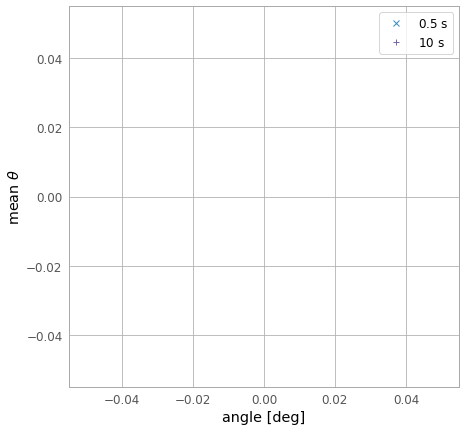

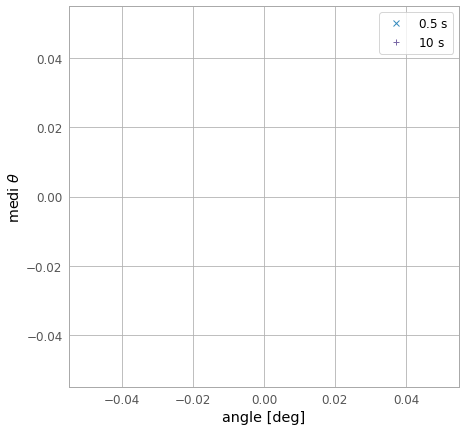

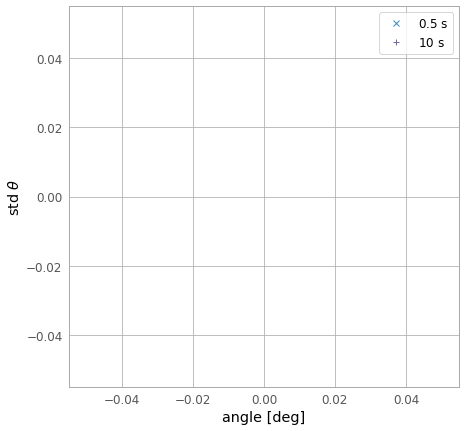

In [48]:
# the mean, median and std deviation for sigma_x for all angles
plt.figure(figsize=(7, 7))
plt.plot(angles_05, mean_05, 'x', label=r'$0.5$ s')
plt.plot(angles_10, mean_10, '+', label=r'$10$ s')
plt.xlabel('angle [deg]')
plt.ylabel(r'mean $\theta$')
plt.legend()
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(angles_05, med_05, 'x', label=r'$0.5$ s')
plt.plot(angles_10, med_10, '+', label=r'$10$ s')
plt.xlabel('angle [deg]')
plt.ylabel(r'medi $\theta$')
plt.legend()
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(angles_05, std_05, 'x', label=r'$0.5$ s')
plt.plot(angles_10, std_10, '+', label=r'$10$ s')
plt.xlabel('angle [deg]')
plt.ylabel(r'std $\theta$')
plt.legend()
plt.show()
